# Analyze DOPE-v1.1 (3k) with ResPose-v1.1 (3k)
## Pretrained VGG
## Corrected map-slicing

In this notebook I try to compare the performance of both DOPE and ResPosev1. Both data were trainined on 010_potted_meat_can_16k = 3k images for 60 epochs.

In this notebook I try to compare the performance of both DOPE and ResPosev1. Both data were trainined on 010_potted_meat_can_16k = 3k images for 60 epochs.
Previously my map-slicing from ResPose's output was wrong. Now it is corrected.
The results indicate that ResPose is working now and working very well despite having 1/3 less numb. of filters compared to DOPE.

Compared to not using VGG pretrained weights this model is more confident in its predictions.

In [1]:
import cv2
import matplotlib.pyplot as plt
import torch
from detector import *
from dope_utilities import *

## Load Data and Models

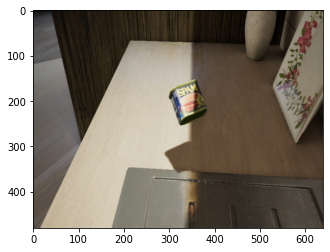

In [2]:
## Select epoch number of DOPE and ResPose to comapre
rp_epoch = 60
rp2_epoch = 60



# load color image
data_path = 'Dataset/dev/'
index = 0
in_img, beliefsTruths, _ = get_truth_maps(data_path, index)

width,height = 480,640
# in_img = cv2.imread(img_path)
in_img = cv2.resize(in_img, (height, width))
# in_img = cv2.cvtColor(in_img, cv2.COLOR_BGR2RGB)
plt.imshow(in_img)

In [4]:
# Misc
name = 'meat' # Not useful
gpu_id = 1 # which gpu to use
device = torch.device("cuda:"+str(gpu_id))

# ResPose - Select weight
network="ResPose"
# net_path = "weights/rp_meat_v1.1_16img/net_epoch_" + str(rp_epoch) + '.pth'
net_path = "weights/rp_meat_16img_Lr/net_epoch_" + str(rp_epoch) + '.pth'
model = ModelData(name, net_path, gpu_id, network)
model.load_net_model()
rp_model = model.net

## ResPose2 - Select weight
network="ResPose2"
net_path = 'weights/rp1.2_meat_16img_Lr/net_epoch_' + str(rp2_epoch) + '.pth'
# net_path = 'weights/rp2_meat_lr/net_epoch_' + str(rp2_epoch) + '.pth'
# net_path = 'weights/rp2_meat_16img_Lr/net_epoch_' + str(rp2_epoch) + '.pth'
model = ModelData(name, net_path, gpu_id, network)
model.load_net_model()
rp2_model = model.net



Loading DOPE model 'weights/dope_meat_16img_Lr/net_epoch_60.pth'...
Training network without imagenet weights.
    Model loaded in 2.2107229232788086 seconds.
Loading DOPE model 'weights/rp1.2_meat_16img_Lr/net_epoch_60.pth'...
Training network pretrained on imagenet.
Loading vgg pretrained weights from : weights/vgg19-dcbb9e9d.pth
    Model loaded in 2.129359722137451 seconds.


## Belief Maps Comparison
Belief Maps (6th cascade's output) from both the netowrks are compared side by side. The maps are overlaid on top of the original input image. Belief maps are thresholded to display the top 90% predicted locations.

In [5]:
# Run network inference
cascade_to_viz = -1
image_tensor = transform(in_img)
image_torch = Variable(image_tensor).to(device).unsqueeze(0)

out, seg = reshape_maps(rp_model(image_torch))
beliefs_rp = out[cascade_to_viz][0].cpu() # Select the last cascade's output only

out, seg = reshape_maps(rp2_model(image_torch))
beliefs_rp2 = out[cascade_to_viz][0].cpu() # Select the last cascade's output only


compare_belief_maps(beliefsTruths, beliefs_rp, beliefs_rp2, in_img)
print(f"ResPose Epoch: {rp_epoch}")
print(f"ResPose2 Epoch: {rp2_epoch}")

TypeError: list indices must be integers or slices, not tuple